In [1]:
import matplotlib.pyplot as plt

In [7]:
from utils.utils_matching import imshow_msk, imshow_sample, get_sampling, imshow_both, imshow_both_interp, get_otmatching
from utils.compute_features_pointset import compute_features_alexnet
import numpy as np
from scipy.spatial import distance_matrix
import torch

# OPEN SOURCE IMAGE

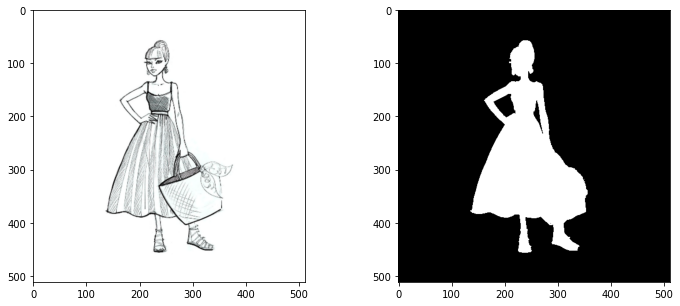

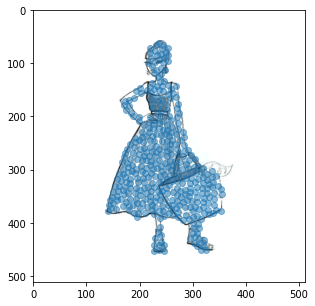

In [10]:
# in the same folder you have 'name_of_image'_mask.png
path_img_A = 'example/3_img.png' 

# save sampling in 'name_of_image'_sample.npy, if you have the lib uses the file save.
img_A, msk_A, sample_A = get_sampling(path_img_A, r=5) 

imshow_msk(img_A, msk_A)
imshow_sample(img_A, sample_A)

# OPEN DESTINATION IMAGE

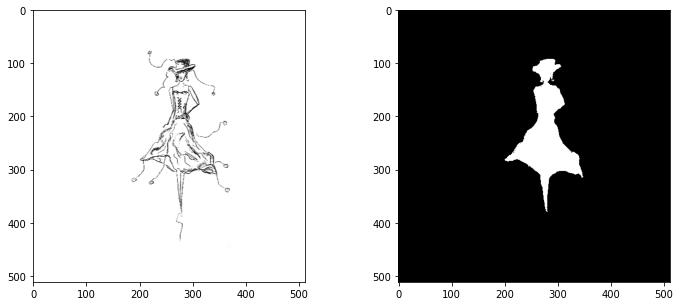

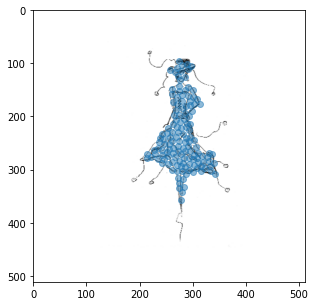

In [11]:
path_img_B = 'example/1_img.png'
img_B, msk_B, sample_B = get_sampling(path_img_B, r=5)
imshow_msk(img_B, msk_B)
imshow_sample(img_B, sample_B)

# COMPUTE FEATURES AND MATCH

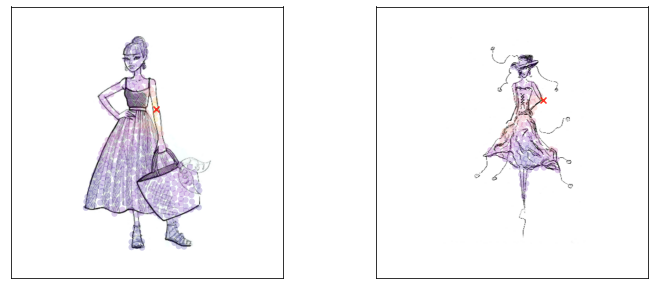

In [12]:
# compute the features for all sample. If you have 'name_of_image'_sketchzooms_alexnet_triplet.npy uses this.
feature_sketchzoom_A = compute_features_alexnet(sample_A, 
                                                path_img_A, 
                                                "checkpoint_net/alexnet_triplet.pkl", 
                                                replace=False, 
                                                device='cpu')

feature_sketchzoom_B = compute_features_alexnet(sample_B, 
                                                path_img_B, 
                                                "checkpoint_net/alexnet_triplet.pkl", 
                                                replace=False, 
                                                device='cpu')

#compute the distance matrix for the set of features.
ot_sketchzoom = distance_matrix( feature_sketchzoom_A, feature_sketchzoom_B)

#show the match for the sample '10'
imshow_both_interp(img_A, img_B, sample_A, sample_B, 10, ot_sketchzoom, feature_sketchzoom_A, feature_sketchzoom_B)